# Identification

Name: Renan Ryu Kajihara

NUSP: 14605762

# Name of the dataset
Dataset: Chicago Crime

# Abstract
O dataset "Chicago Crime" mostra crimes reportados pelo Departamento de Polícia de Chicago nos anos de 2014, 2015 e 2016. Tal dataset possui informações relevantes sobre a localização, gravidade, descrição e data dos crimes reportados, sendo tais dados fundamentais para o estudo do dataset.

# Questions to the dataset
Question 1: Qual a relação entre ocorrências de crime e as estações do
ano?

Question 2: O número de crimes em cada distrito condiz com o número de prisões em cada distrito? Em quais distritos a razão entre crimes por prisões é maior?

Question 3: Crimes domésticos têm distribuição de focos distinta? A razão entre crimes domésticos por prisão é diferente comparada à razão de entre outros crimes por prisão?

# EDA strategy

Para estudar este dataset, serem utilizados, principalmente, gráficos e histogramas que ajudem na visualização dos temas abordados, com o objetivo de que tais figuras auxiliem a achar soluções para as perguntas acima.


# Some examples of analysis/visualizations:

1) Present the mean, variance, min, median and max values for each attribute. If the dataset has too many attibutes, choose the more significant ones. Present your code and some remarks to help the understanding.

2) How well distributed are the dataset in relation the each attribute. How can you visually check that? Hint: plot a histogram

3) Is there any attribute that can be used to better interpret the dataset? Show this in a graphic where you used this attribute to group (groupby) the data.

4) Is there any outlier's pattern?

5) Make your own remarks about the dataset. Try to use one or more graphics to justify your remarks.

6) Is there any symmetry that can be stressed?

7) How important was EDA to help you understand the dataset?

In [1]:
import pandas as pd
from statistics import mean, median
import matplotlib.pyplot as plt

chi14 = pd.read_csv('https://drive.google.com/uc?export=download&id=189ZRV-iBu_dWQBP-129VxOxFj41KVfh4')
chi15 = pd.read_csv('https://drive.google.com/uc?export=download&id=12AgJtTRDrcUqyxOqsqFXDph18hYNSIwP')
chi16 = pd.read_csv('https://drive.google.com/uc?export=download&id=1xsXwBr4FMSX2v82_ovFVZtdyxUVJBCn7')



In [ ]:
chi14.tail()

,ID,Case Number,Date,Block,IUCR,Primary Type,Description,Location Description,Arrest,Domestic,Beat,District,Ward,Community Area,FBI Code,Latitude,Longitude
274418,10362481,HY554205,08/15/2014 09:00:00 PM,048XX N CLARK ST,1130,DECEPTIVE PRACTICE,FRAUD OR CONFIDENCE GAME,APARTMENT,False,False,2032,20,46.0,3.0,11,NaN,NaN
274419,10362558,HY554336,08/31/2014 03:00:00 AM,028XX W 19TH ST,0281,CRIM SEXUAL ASSAULT,NON-AGGRAVATED,HOSPITAL BUILDING/GROUNDS,False,False,1022,10,12.0,30.0,02,NaN,NaN
274420,10363233,HY554972,02/20/2014 12:00:00 PM,046XX W NORTH AVE,1153,DECEPTIVE PRACTICE,FINANCIAL IDENTITY THEFT OVER $ 300,OTHER,False,False,2533,25,37.0,25.0,11,NaN,NaN
274421,10363368,HY555019,09/02/2014 09:00:00 AM,047XX N BEACON ST,1153,DECEPTIVE PRACTICE,FINANCIAL IDENTITY THEFT OVER $ 300,APARTMENT,False,False,1913,19,46.0,3.0,11,NaN,NaN
274422,10364473,HY556366,12/04/2014 09:00:00 AM,012XX W LUNT AVE,1153,DECEPTIVE PRACTICE,FINANCIAL IDENTITY THEFT OVER $ 300,APARTMENT,False,False,2431,24,49.0,1.0,11,NaN,NaN


In [ ]:
datas_chi14 = pd.to_datetime(chi14['Date'], format='%m/%d/%Y %I:%M:%S %p')
meses_chi14 = datas_chi14.dt.month

datas_chi15 = pd.to_datetime(chi15['Date'], format='%m/%d/%Y %I:%M:%S %p')
meses_chi15 = datas_chi15.dt.month

datas_chi16 = pd.to_datetime(chi16['Date'], format='%m/%d/%Y %I:%M:%S %p')
meses_chi16 = datas_chi16.dt.month

meses_concatenados = pd.concat([meses_chi14, meses_chi15, meses_chi16])

meses_concatenados.value_counts()

,count
Date,
7,74898
8,74816
6,71959
5,71496
9,69774
3,65509
4,65266
10,64249
1,60789


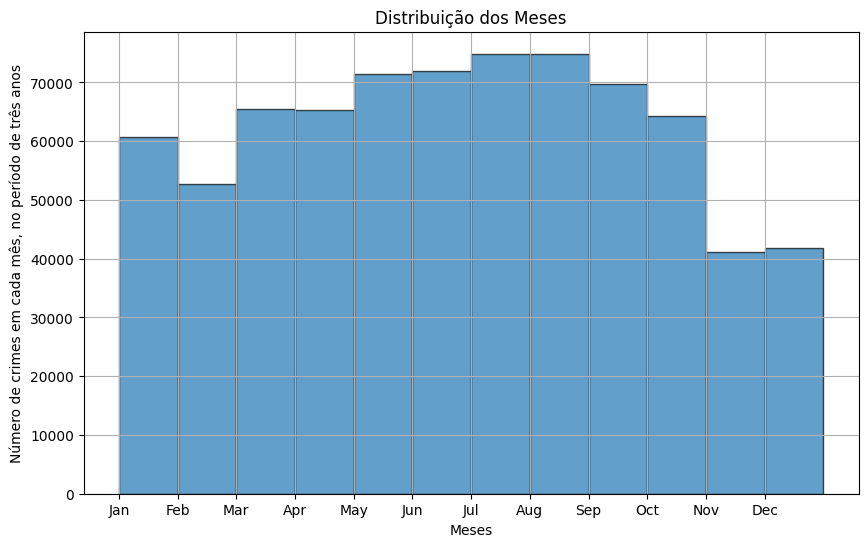

In [ ]:

plt.figure(figsize=(10, 6))
plt.hist(meses_concatenados, bins=range(1, 14), edgecolor='black', alpha=0.7)
plt.title('Distribuição dos Meses')
plt.xlabel('Meses')
plt.ylabel('Número de crimes em cada mês, no período de três anos')
plt.xticks(range(1, 13), ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
plt.grid(True)
plt.show()

A partir da tabela e do histograma gerados, é possível observar que os meses 1,2, 11 e 12 são os que menos apresentaram crimes na cidade de Chicago. Nesse sentido, tais meses representam a época mais fria que ocorre nos Estados Unidos, sendo esses os meses que representam o fim do outono e o inverno. Além disso, observa-se que a maior quantidade de crimes ocorreu entre junho e agosto, período em que o verão é a estação do ano vigente. Dessa forma, evidencia-se que há uma relação entre as estações do ano e a ocorrência de crimes na cidade de Chicago, na qual nos meses mais quentes ocorrem mais crimes, enquanto nos meses mais frios ocorrem menos crimes.

Entretanto, é possível que outros fatores acarretem nessa diferença. Por exemplo, é evidente que, no final do ano, os crimes diminuem bruscamente.

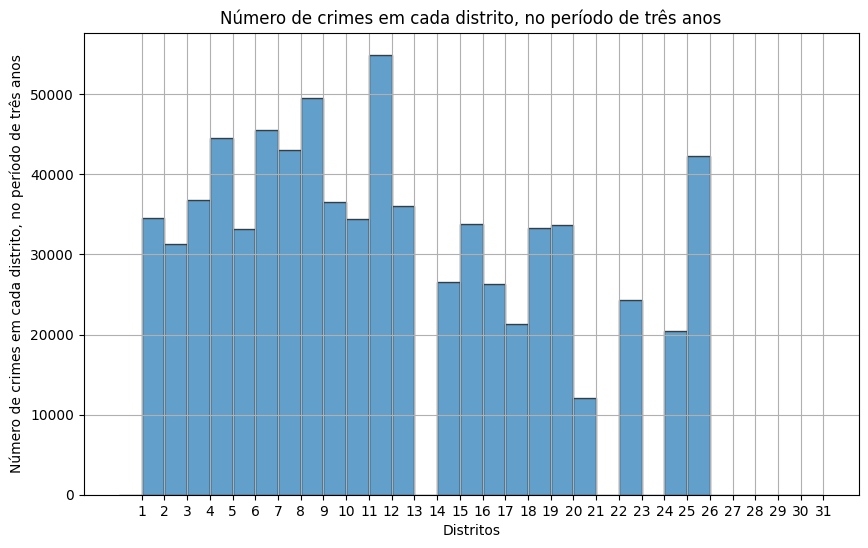

In [93]:
chi = pd.concat([chi14,chi15,chi16])

plt.figure(figsize=(10, 6))
plt.hist(chi['District'], bins=range(0,32), edgecolor='black', alpha=0.7)
plt.title('Número de crimes em cada distrito, no período de três anos')
plt.xlabel('Distritos')
plt.ylabel('Número de crimes em cada distrito, no período de três anos')
plt.xticks(range(1, 32) )
plt.grid(True)
plt.show()

In [ ]:
chi['District'].value_counts()

,count
District,
11,54929
8,49534
6,45525
4,44558
7,43007
25,42232
3,36792
9,36509
12,36095


In [23]:
arrests_by_district=chi[chi['Arrest'] == True].groupby('District').size()
print(arrests_by_district)

District
1      8067
2      5916
3      8868
4     11284
5      9036
6     11795
7     13279
8     11111
9      9288
10    10151
11    24068
12     6178
14     4130
15    12386
16     4857
17     3515
18     6189
19     6138
20     2627
22     5162
24     4122
25    11680
31       11
dtype: int64


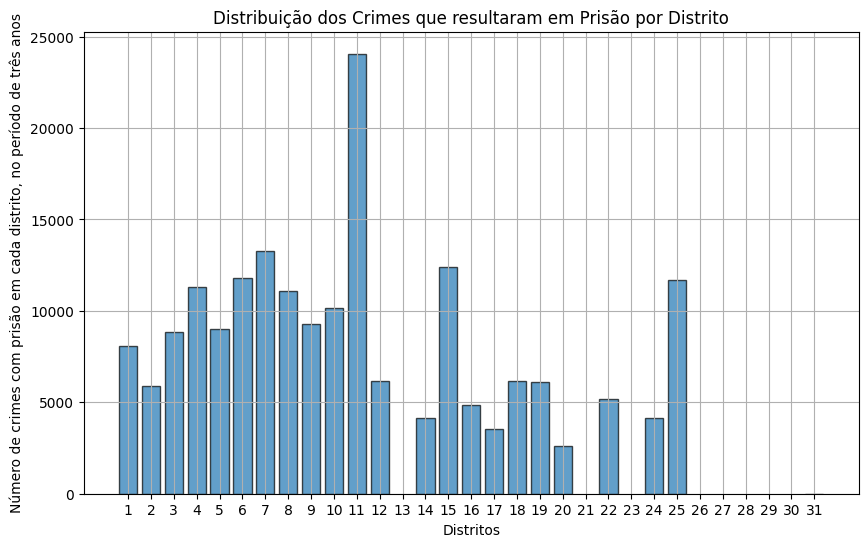

In [94]:
plt.figure(figsize=(10, 6))
plt.bar(arrests_by_district.index, arrests_by_district.values, edgecolor='black', alpha=0.7)
plt.title('Distribuição dos Crimes que resultaram em Prisão por Distrito')
plt.xlabel('Distritos')
plt.ylabel('Número de crimes com prisão em cada distrito, no período de três anos')
plt.xticks(range(1, 32))
plt.grid(True)
plt.show()

In [56]:
crimes_distritos = chi.groupby('District').size()

razao_prisoes_crimes =[]
for i in range (1,32):
  if (i not in [13,21,23,26,27,28,29,30]):
    razao_prisoes_crimes.append(arrests_by_district[i]/crimes_distritos[i])
  else:
    razao_prisoes_crimes.append(0)
print(razao_prisoes_crimes)

[0.23344040281274417, 0.1890699904122723, 0.241030658838878, 0.2532429642264015, 0.2720949140293294, 0.25908841295991214, 0.3087636896319204, 0.2243105745548512, 0.2544030239119121, 0.2950271747028221, 0.4381656319976697, 0.17115944036570163, 0, 0.15519314594919587, 0.36680783013000856, 0.18462766564032387, 0.16479909981715035, 0.1859675480769231, 0.1823258577157285, 0.21667766413724843, 0, 0.21200919993428619, 0, 0.20156479217603912, 0.2765675317294942, 0, 0, 0, 0, 0, 0.7857142857142857]


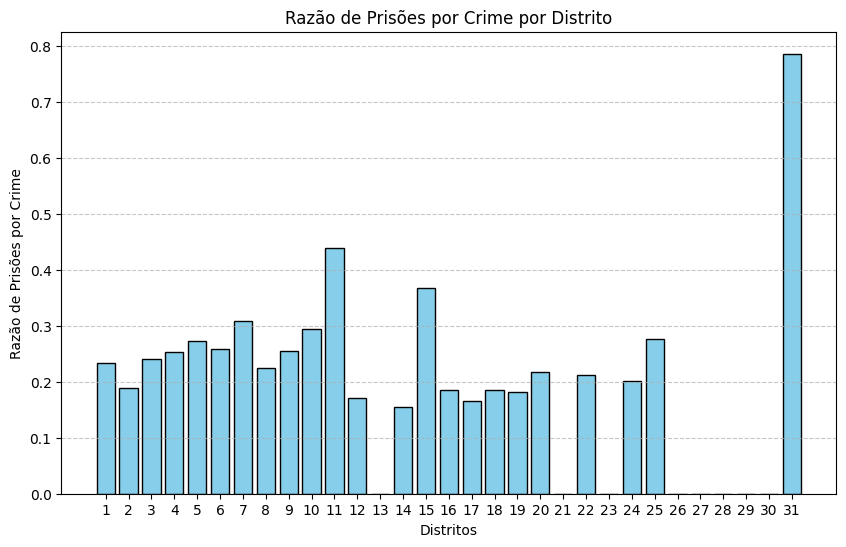

In [95]:

distritos = list(range(1, 32))

plt.figure(figsize=(10, 6))
plt.bar(distritos, razao_prisoes_crimes, color='skyblue', edgecolor='black')
plt.title('Razão de Prisões por Crime por Distrito')
plt.xlabel('Distritos')
plt.ylabel('Razão de Prisões por Crime')
plt.xticks(range(1, 32))
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

Ignorando os dados em que a amostragem é muito pequena (como os dados do distrito 31), observa-se que os distritos que tiveram mais prisões por crime foram os distritos 11 e 15. Nesse sentido, observa-se que o distrito que teve um maior número de crimes registrados (distrito 11) foi, também, o distrito que teve o maior número de prisões por crime.

In [69]:
crimes_domesticos = chi[chi['Domestic'] == True]
crimes_domesticos_por_distrito = crimes_domesticos.groupby('District').size()

print(crimes_domesticos_por_distrito)

District
1     1666
2     5496
3     8078
4     9170
5     6848
6     9806
7     9057
8     7524
9     5810
10    6623
11    9111
12    3777
13       1
14    2668
15    6916
16    3264
17    2712
18    1456
19    2071
20    1212
22    4209
24    2859
25    7238
dtype: int64


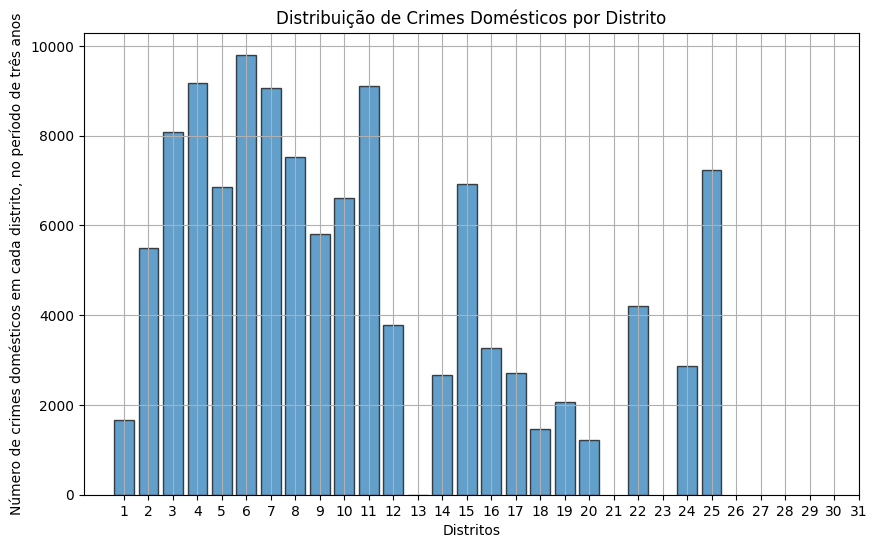

In [70]:
plt.figure(figsize=(10, 6))
plt.bar(crimes_domesticos_por_distrito.index, crimes_domesticos_por_distrito.values, edgecolor='black', alpha=0.7)
plt.title('Distribuição de Crimes Domésticos por Distrito')
plt.xlabel('Distritos')
plt.ylabel('Número de crimes domésticos em cada distrito, no período de três anos')
plt.xticks(range(1, 32))  # Ajustar os ticks para exibir cada distrito
plt.grid(True)
plt.show()

In [73]:
prisoes_crimes_domesticos_por_distrito=crimes_domesticos[crimes_domesticos['Arrest'] == True].groupby('District').size()
print(prisoes_crimes_domesticos_por_distrito)

District
1      286
2      842
3     1542
4     1957
5     1531
6     1858
7     1680
8     1529
9     1277
10    1380
11    1488
12     570
14     724
15    1436
16     652
17     594
18     251
19     450
20     274
22     670
24     598
25    1808
dtype: int64


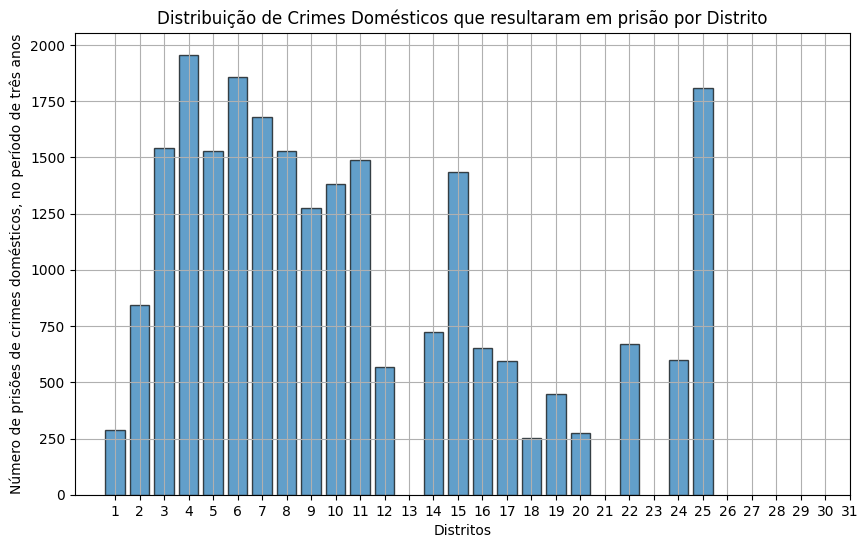

In [96]:
plt.figure(figsize=(10, 6))
plt.bar(prisoes_crimes_domesticos_por_distrito.index, prisoes_crimes_domesticos_por_distrito.values, edgecolor='black', alpha=0.7)
plt.title('Distribuição de Crimes Domésticos que resultaram em prisão por Distrito')
plt.xlabel('Distritos')
plt.ylabel('Número de prisões de crimes domésticos, no período de três anos')
plt.xticks(range(1, 32))
plt.grid(True)
plt.show()

In [80]:
razao_prisoes_crimes_domesticos =[]
for i in range (1,32):
  if (i not in [13,21,23,26,27,28,29,30,31]):
    razao_prisoes_crimes_domesticos.append(prisoes_crimes_domesticos_por_distrito[i]/crimes_domesticos_por_distrito[i])
  else:
    razao_prisoes_crimes_domesticos.append(0)
print(razao_prisoes_crimes_domesticos)

[0.1716686674669868, 0.1532023289665211, 0.19088883386976974, 0.2134133042529989, 0.22356892523364486, 0.18947583112380176, 0.18549188473004305, 0.20321637426900585, 0.21979345955249568, 0.20836478937037597, 0.16331906486664471, 0.15091342335186655, 0, 0.27136431784107945, 0.20763447079236552, 0.19975490196078433, 0.21902654867256638, 0.1723901098901099, 0.2172863351038146, 0.22607260726072606, 0, 0.15918270373010215, 0, 0.20916404337180833, 0.2497927604310583, 0, 0, 0, 0, 0, 0]


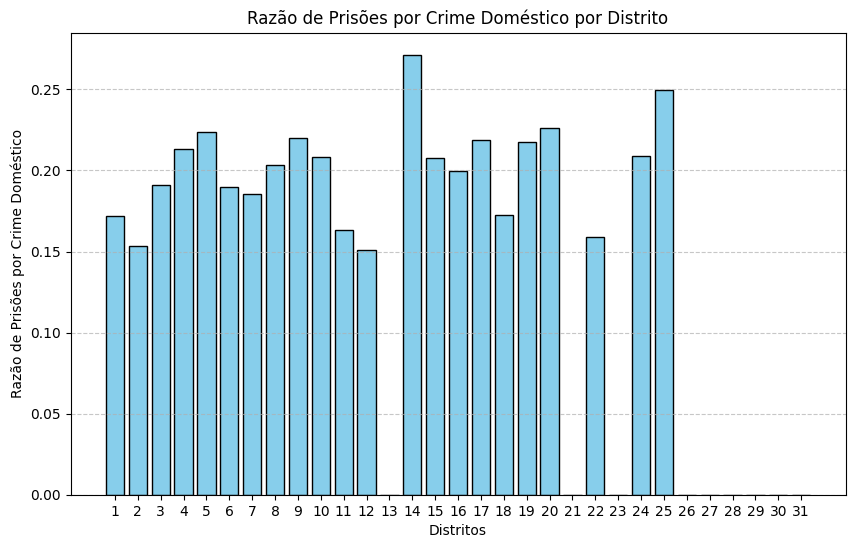

In [97]:
distritos = list(range(1, 32))

plt.figure(figsize=(10, 6))
plt.bar(distritos, razao_prisoes_crimes_domesticos, color='skyblue', edgecolor='black')
plt.title('Razão de Prisões por Crime Doméstico por Distrito')
plt.xlabel('Distritos')
plt.ylabel('Razão de Prisões por Crime Doméstico')
plt.xticks(range(1, 32))
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

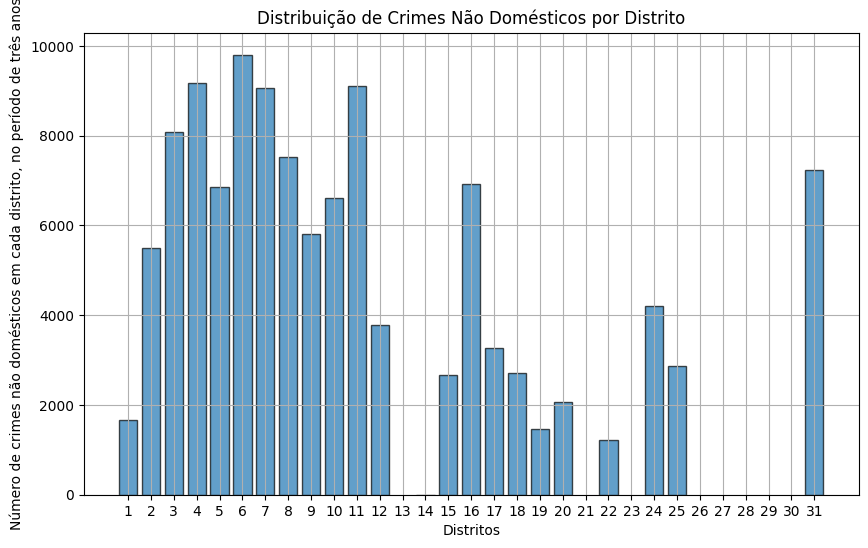

In [98]:
crimes_nao_domesticos = chi[chi['Domestic'] == False]
crimes_nao_domesticos_por_distrito = crimes_nao_domesticos.groupby('District').size()

plt.figure(figsize=(10, 6))
plt.bar(crimes_nao_domesticos_por_distrito.index, crimes_domesticos_por_distrito.values, edgecolor='black', alpha=0.7)
plt.title('Distribuição de Crimes Não Domésticos por Distrito')
plt.xlabel('Distritos')
plt.ylabel('Número de crimes não domésticos em cada distrito, no período de três anos')
plt.xticks(range(1, 32))
plt.grid(True)
plt.show()


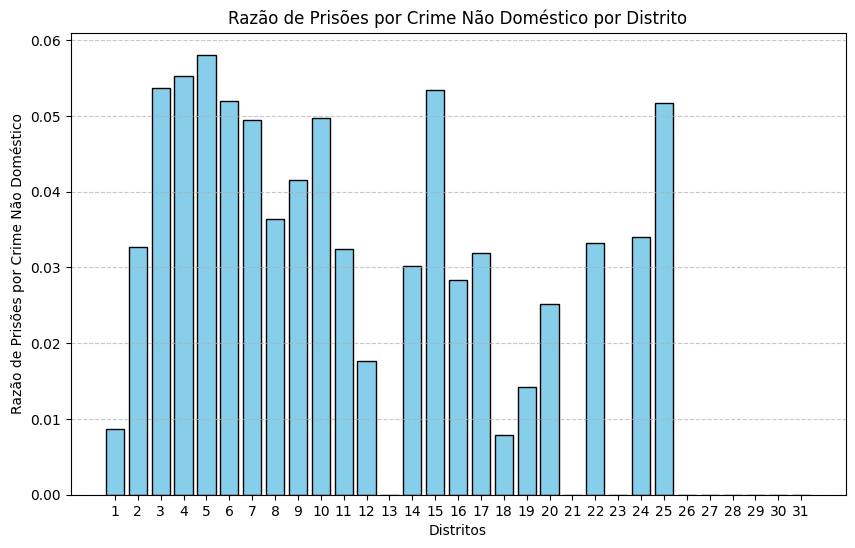

In [99]:

prisoes_crimes_nao_domesticos_por_distrito=crimes_nao_domesticos[crimes_nao_domesticos['Arrest'] == True].groupby('District').size()

razao_prisoes_crimes_nao_domesticos =[]
for i in range (1,32):
  if (i not in [13,21,23,26,27,28,29,30,31]):
    razao_prisoes_crimes_nao_domesticos.append(prisoes_crimes_domesticos_por_distrito[i]/crimes_nao_domesticos_por_distrito[i])
  else:
    razao_prisoes_crimes_nao_domesticos.append(0)

distritos = list(range(1, 32))

plt.figure(figsize=(10, 6))
plt.bar(distritos, razao_prisoes_crimes_nao_domesticos, color='skyblue', edgecolor='black')
plt.title('Razão de Prisões por Crime Não Doméstico por Distrito')
plt.xlabel('Distritos')
plt.ylabel('Razão de Prisões por Crime Não Doméstico')
plt.xticks(range(1, 32))
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

Primeiramente, é possível observar que o foco de crimes domésticos é um pouco diferente dos crimes não domésticos. O distrito 25, por exemplo, é um distrito que tem um alto números de crimes domésticos, enquanto o número de crimes não domśticos não é tão alta.

Além disso, evidencia-se que a razão entre prisões por crimes domésticos é muito menor do que a razão entre prisões por crimes não domésticos, em praticamente todos os distritos. No distrito 5, por exemplo, menos de 25% dos crimes domésticos acabam em prisão, enquanto mais de 50% dos crimes não domésticos acabam em prisão.